FACE MASK DETECTION

In [1]:
#import required libraries
import tensorflow

In [2]:
#image generation and devide dataset into train and validation dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.20)

In [3]:
#train dataset
train_data=train_gen.flow_from_directory("mask_dataset",
                                          target_size=(224,224),batch_size=32,class_mode="binary",subset="training")

Found 643 images belonging to 2 classes.


In [4]:
#classes of train dataset
train_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [5]:
#for validation data
validation_data=train_gen.flow_from_directory("mask_dataset",
                                          target_size=(224,224),batch_size=32,class_mode="binary",subset="validation")

Found 160 images belonging to 2 classes.


In [6]:
#classes for validation dataset
validation_data.class_indices

{'with_mask': 0, 'without_mask': 1}

BUILD CNN ARCHITECTURE

In [7]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization

In [8]:
#built architecture
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation="relu",padding="same",input_shape=[224,224,3]))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(units=1,activation="sigmoid"))

In [9]:
#summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                        

In [10]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
#import callback for avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(monitor="accuracy",patience=10)

In [12]:
#fit the model
model.fit(train_data,validation_data=validation_data,callbacks=[es],epochs=20)

Epoch 1/20
21/21 [==============================] - 49s 2s/step - loss: 0.4998 - accuracy: 0.7714 - val_loss: 0.6165 - val_accuracy: 0.5312
Epoch 2/20
21/21 [==============================] - 52s 2s/step - loss: 0.3699 - accuracy: 0.8818 - val_loss: 0.6215 - val_accuracy: 0.5312
Epoch 3/20
21/21 [==============================] - 51s 2s/step - loss: 0.3105 - accuracy: 0.9005 - val_loss: 0.5692 - val_accuracy: 0.6438
Epoch 4/20
21/21 [==============================] - 48s 2s/step - loss: 0.2437 - accuracy: 0.9378 - val_loss: 0.5037 - val_accuracy: 0.7437
Epoch 5/20
21/21 [==============================] - 49s 2s/step - loss: 0.1978 - accuracy: 0.9549 - val_loss: 0.5335 - val_accuracy: 0.6250
Epoch 6/20
21/21 [==============================] - 46s 2s/step - loss: 0.1661 - accuracy: 0.9642 - val_loss: 0.3796 - val_accuracy: 0.9312
Epoch 7/20
21/21 [==============================] - 52s 2s/step - loss: 0.2229 - accuracy: 0.9285 - val_loss: 0.4514 - val_accuracy: 0.9000
Epoch 8/20
21/21 [==

In [13]:
#save both the model weights and model architecture in h5 file
model.save("mask_cnn.h5")

FACE MASK DETECTION FROM TRAINED MODEL(mask_cnn.h5)

In [21]:
#import trained CNN model for prediction
from tensorflow.keras.models import load_model

model=load_model("mask_cnn.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                        

In [22]:
#import required libraries for prediction
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array

In [23]:
#import libraries for sound
#!pip install playsound==1.2.2
from playsound import playsound

import threading

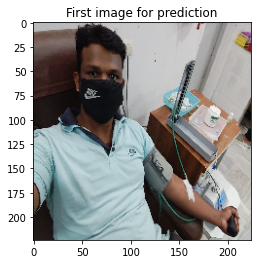

In [24]:
#load image for prediction
img1=load_img("papu1.jpeg",target_size=(224,224,3))
plt.title("First image for prediction")
plt.imshow(img1)

In [25]:
#preprocess image before prediction
img1=img_to_array(img1)
img1=np.expand_dims(img1,axis=0)
img1=img1/255

In [27]:
#prediction on image
pred1=model.predict(img1)
print(pred1)
#conditioning
if np.round(pred1[0][0])==0:
    print("Papu is wearing Mask")
    threading.Thread(target=playsound,args=("child-thank-you.mp3",)).start()
else:
    print("Papu isn't wearing Mask")
    threading.Thread(target=playsound,args=("emergency-alert.mp3",)).start()

[[0.03435966]]
Papu is wearing Mask


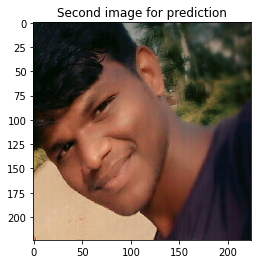

In [28]:
#loading image
img2=load_img("papu2.jpg",target_size=(224,224,3))
plt.title("Second image for prediction")
plt.imshow(img2)

In [29]:
#preprocess image before prediction
img2=img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
img2=img2/255

In [30]:
#prediction
pred2=model.predict(img2)
print(pred2)
#conditioning 
if np.round(pred2[0][0])==0:
    print("Papu is wearing Mask")
    threading.Thread(target=playsound,args=("child-thank-you.mp3",)).start()
else:
    print("Papu...Plz wear Mask")
    threading.Thread(target=playsound,args=("emergency-alert.mp3",)).start()


[[0.8948706]]
Papu...Plz wear Mask
